<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

### 1. Load & Explore Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 1.1 Load Data

In [3]:
# Read CSV
df = pd.read_csv('winequality_merged.csv')

#### 1.2 Explore Data (Exploratory Data Analysis)

In [4]:
# ANSWER
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [6]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


<AxesSubplot:>

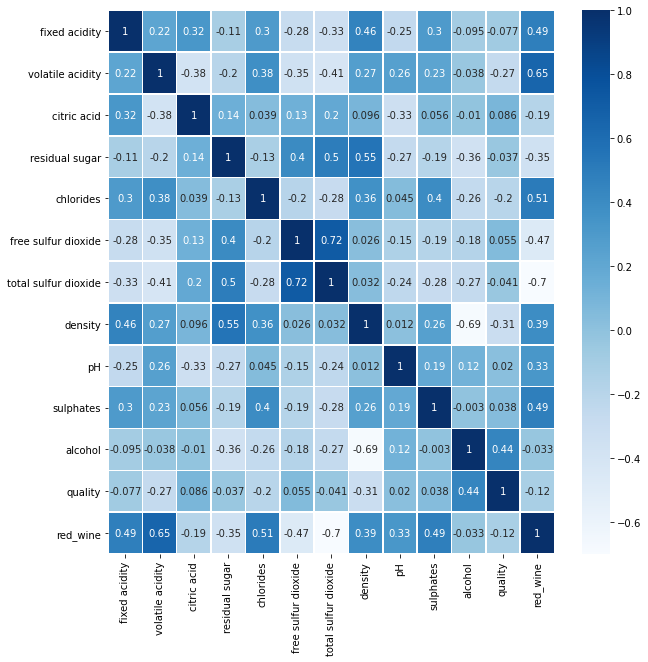

In [7]:
fig,axis = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(),annot = True, ax = axis,linewidths=.5,cmap="Blues")

In [10]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

### 2. Set Target Variable

Create a target variable for wine quality.

In [11]:
# Target Variable
y = df['quality']

### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reason.

In [12]:
# ANSWER
X = df[['density', 'volatile acidity', 'chlorides', 'alcohol']]
X.head()

,density,volatile acidity,chlorides,alcohol
0,0.9978,0.70,0.076,9.4
1,0.9968,0.88,0.098,9.8
2,0.9970,0.76,0.092,9.8
3,0.9980,0.28,0.075,9.8
4,0.9978,0.70,0.076,9.4


### 4. Using Linear Regression Create a Model and Test Score

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [17]:
# Create a model for Linear Regression
model = LinearRegression()

# Fit the model with the Training data
model.fit(X_train, y_train)
# Calculate the score (R^2 for Regression) for Training Data
model.score(X_train, y_train)



0.2707886547599644

In [18]:
# Calculate the score (R^2 for Regression) for Testing Data
model.score(X_test, y_test)

0.2521354751304964

### BONUS: Cross validation

In [19]:
# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error

In [20]:
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    X_train = X.iloc[train, ]
    y_train = y.iloc[train, ]
    X_test = X.iloc[test, ]
    y_test = y.iloc[test, ]
    
    # Fit model with training set
    model.fit(X_train, y_train)
    # Make predictions with training and test set
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))
    
    train_rmse.append(mean_squared_error(y_train, train_predict, squared=False))
    test_rmse.append(mean_squared_error(y_test, test_predict, squared=False))
    
# Create a metrics_df dataframe to display r2 and rmse scores
dataframe_metrics = pd.DataFrame({'Train R2': train_scores, 
                           'Test R2': test_scores, 
                           'Train RMSE': train_rmse, 
                           'Test RMSE': test_rmse},
                          index=[i+1 for i in range(5)])

dataframe_metrics

,Train R2,Test R2,Train RMSE,Test RMSE
1,0.263044,0.282543,0.743627,0.762692
2,0.265475,0.273884,0.750561,0.734752
3,0.272704,0.244148,0.743059,0.765065
4,0.263877,0.280059,0.750024,0.737243
5,0.272500,0.243110,0.749152,0.741140


In [29]:
# Describe the metrics
dataframe_metrics.describe().T

,count,mean,std,min,25%,50%,75%,max
Train R2,5.0,0.267520,0.004721,0.263044,0.263877,0.265475,0.272500,0.272704
Test R2,5.0,0.264749,0.019539,0.243110,0.244148,0.273884,0.280059,0.282543
Train RMSE,5.0,0.747285,0.003639,0.743059,0.743627,0.749152,0.750024,0.750561
Test RMSE,5.0,0.748178,0.014536,0.734752,0.737243,0.741140,0.762692,0.765065


### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data? 

How many feature have you selected? Can you improve your score by selecting different features?

**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



